## **Task 1: Analytical Method**

**Import libraries and create data**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)


**Plot the generated data**

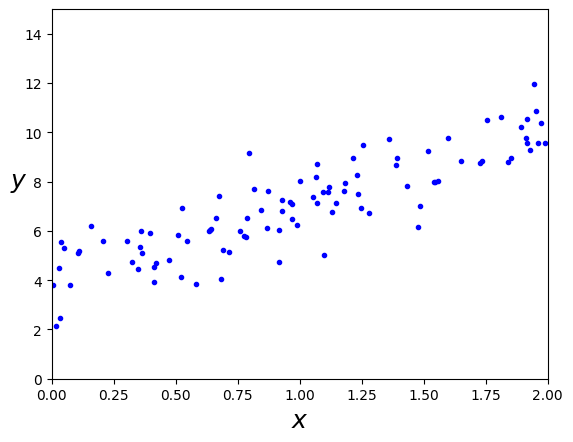

In [ ]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()


**Compute means of X and y**

In [ ]:
Xave = np.average(X)
yave = np.average(y)

**Compute slope b1 using closed-form formula**

In [ ]:
b1 = np.sum((X-Xave)*(y-yave))/(np.sum((X-Xave)**2))

**Compute intercept b0**

b0 = mean(y) - b1 * mean(X)

This completes the closed-form solution for the line: y = b0 + b1*x

In [ ]:
b0 = yave - b1*Xave

**Print the computed intercept and slope**

In [ ]:
print("b0: ", b0)
print("b1: ", b1)

b0:  3.9782300002435282
b1:  3.0657132608150874


 ## **Task 2: Gradient Descent Method**

**Define the cost function for gradient descent**
- cal_cost returns the Mean Squared Error scaled by 1/(2*m)
- predictions are computed by X.dot(theta), where X includes a bias column
- This function will be used to evaluate how well theta fits the data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def  cal_cost(theta,X,y):
    m = len(y)

    predictions = np.dot(X, theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions-y))
    return cost


**Implement gradient descent optimizer**
- Iteratively update theta to minimize the cost function
- Store theta_history and cost_history to analyze convergence
- This implementation uses a vectorized update: theta = theta - (learning_rate/m) * X.T.dot(prediction - y)

In [ ]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):

        prediction = np.dot(X, theta) #use X and theta to compute prediction

        theta = theta - learning_rate*(1/m)*(X.T.dot(prediction-y)) #update the theta

        #track the theta_history
        theta_history[it,:] =theta.T
        #track the cost history
        cost_history[it]  = cal_cost(theta,X,y)

    return theta, cost_history, theta_history


**Set hyperparameters and run gradient descent**
- lr: learning rate; n_iter: number of iterations
- theta initialized randomly (2x1 for bias and slope)
- X_b is X with a bias (ones column) added for the intercept term

In [ ]:
lr =0.01
n_iter = 200

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))


Theta0:          3.177,
Theta1:          3.652
Final cost/MSE:  0.563


**Plot cost history to check convergence**
- If gradient descent worked, cost_history should show a decreasing trend
- This plot helps verify the algorithm is learning properly

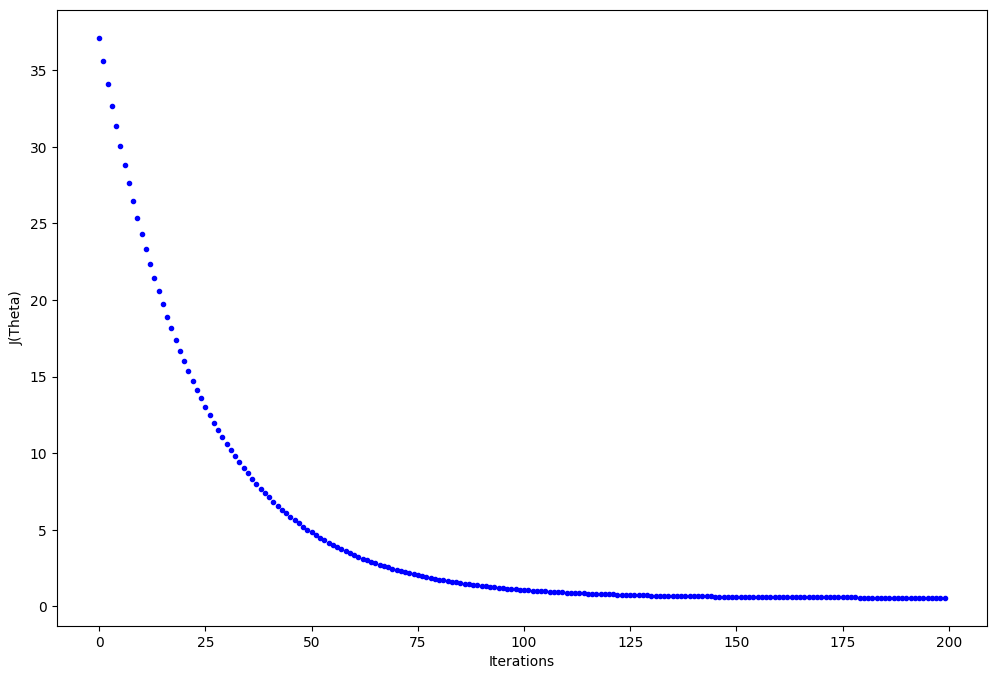

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')



## **Task 3: Effect of Learning Rate**

**Function to demonstrate gradient descent progress visually**
- This function runs gradient descent one step at a time and plots intermediate fit lines
- alpha (transparency) is incremented so later lines appear more solid
- cost_history records the cost for each one-step update

In [ ]:
def plot_GD(n_iter,lr,ax,ax1=None):
    _ = ax.plot(X,y,'b.')
    theta = np.random.randn(2,1)
    tr =0.1
    cost_history = np.zeros(n_iter)
    for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)
        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
    if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')


**Run experiments comparing different learning rates**
- it_lr contains (iterations, learning_rate) pairs for comparison
- Subplots show both the evolving regression lines and the cost vs iterations
- This visually highlights the effect of learning rate on convergence speed/stability

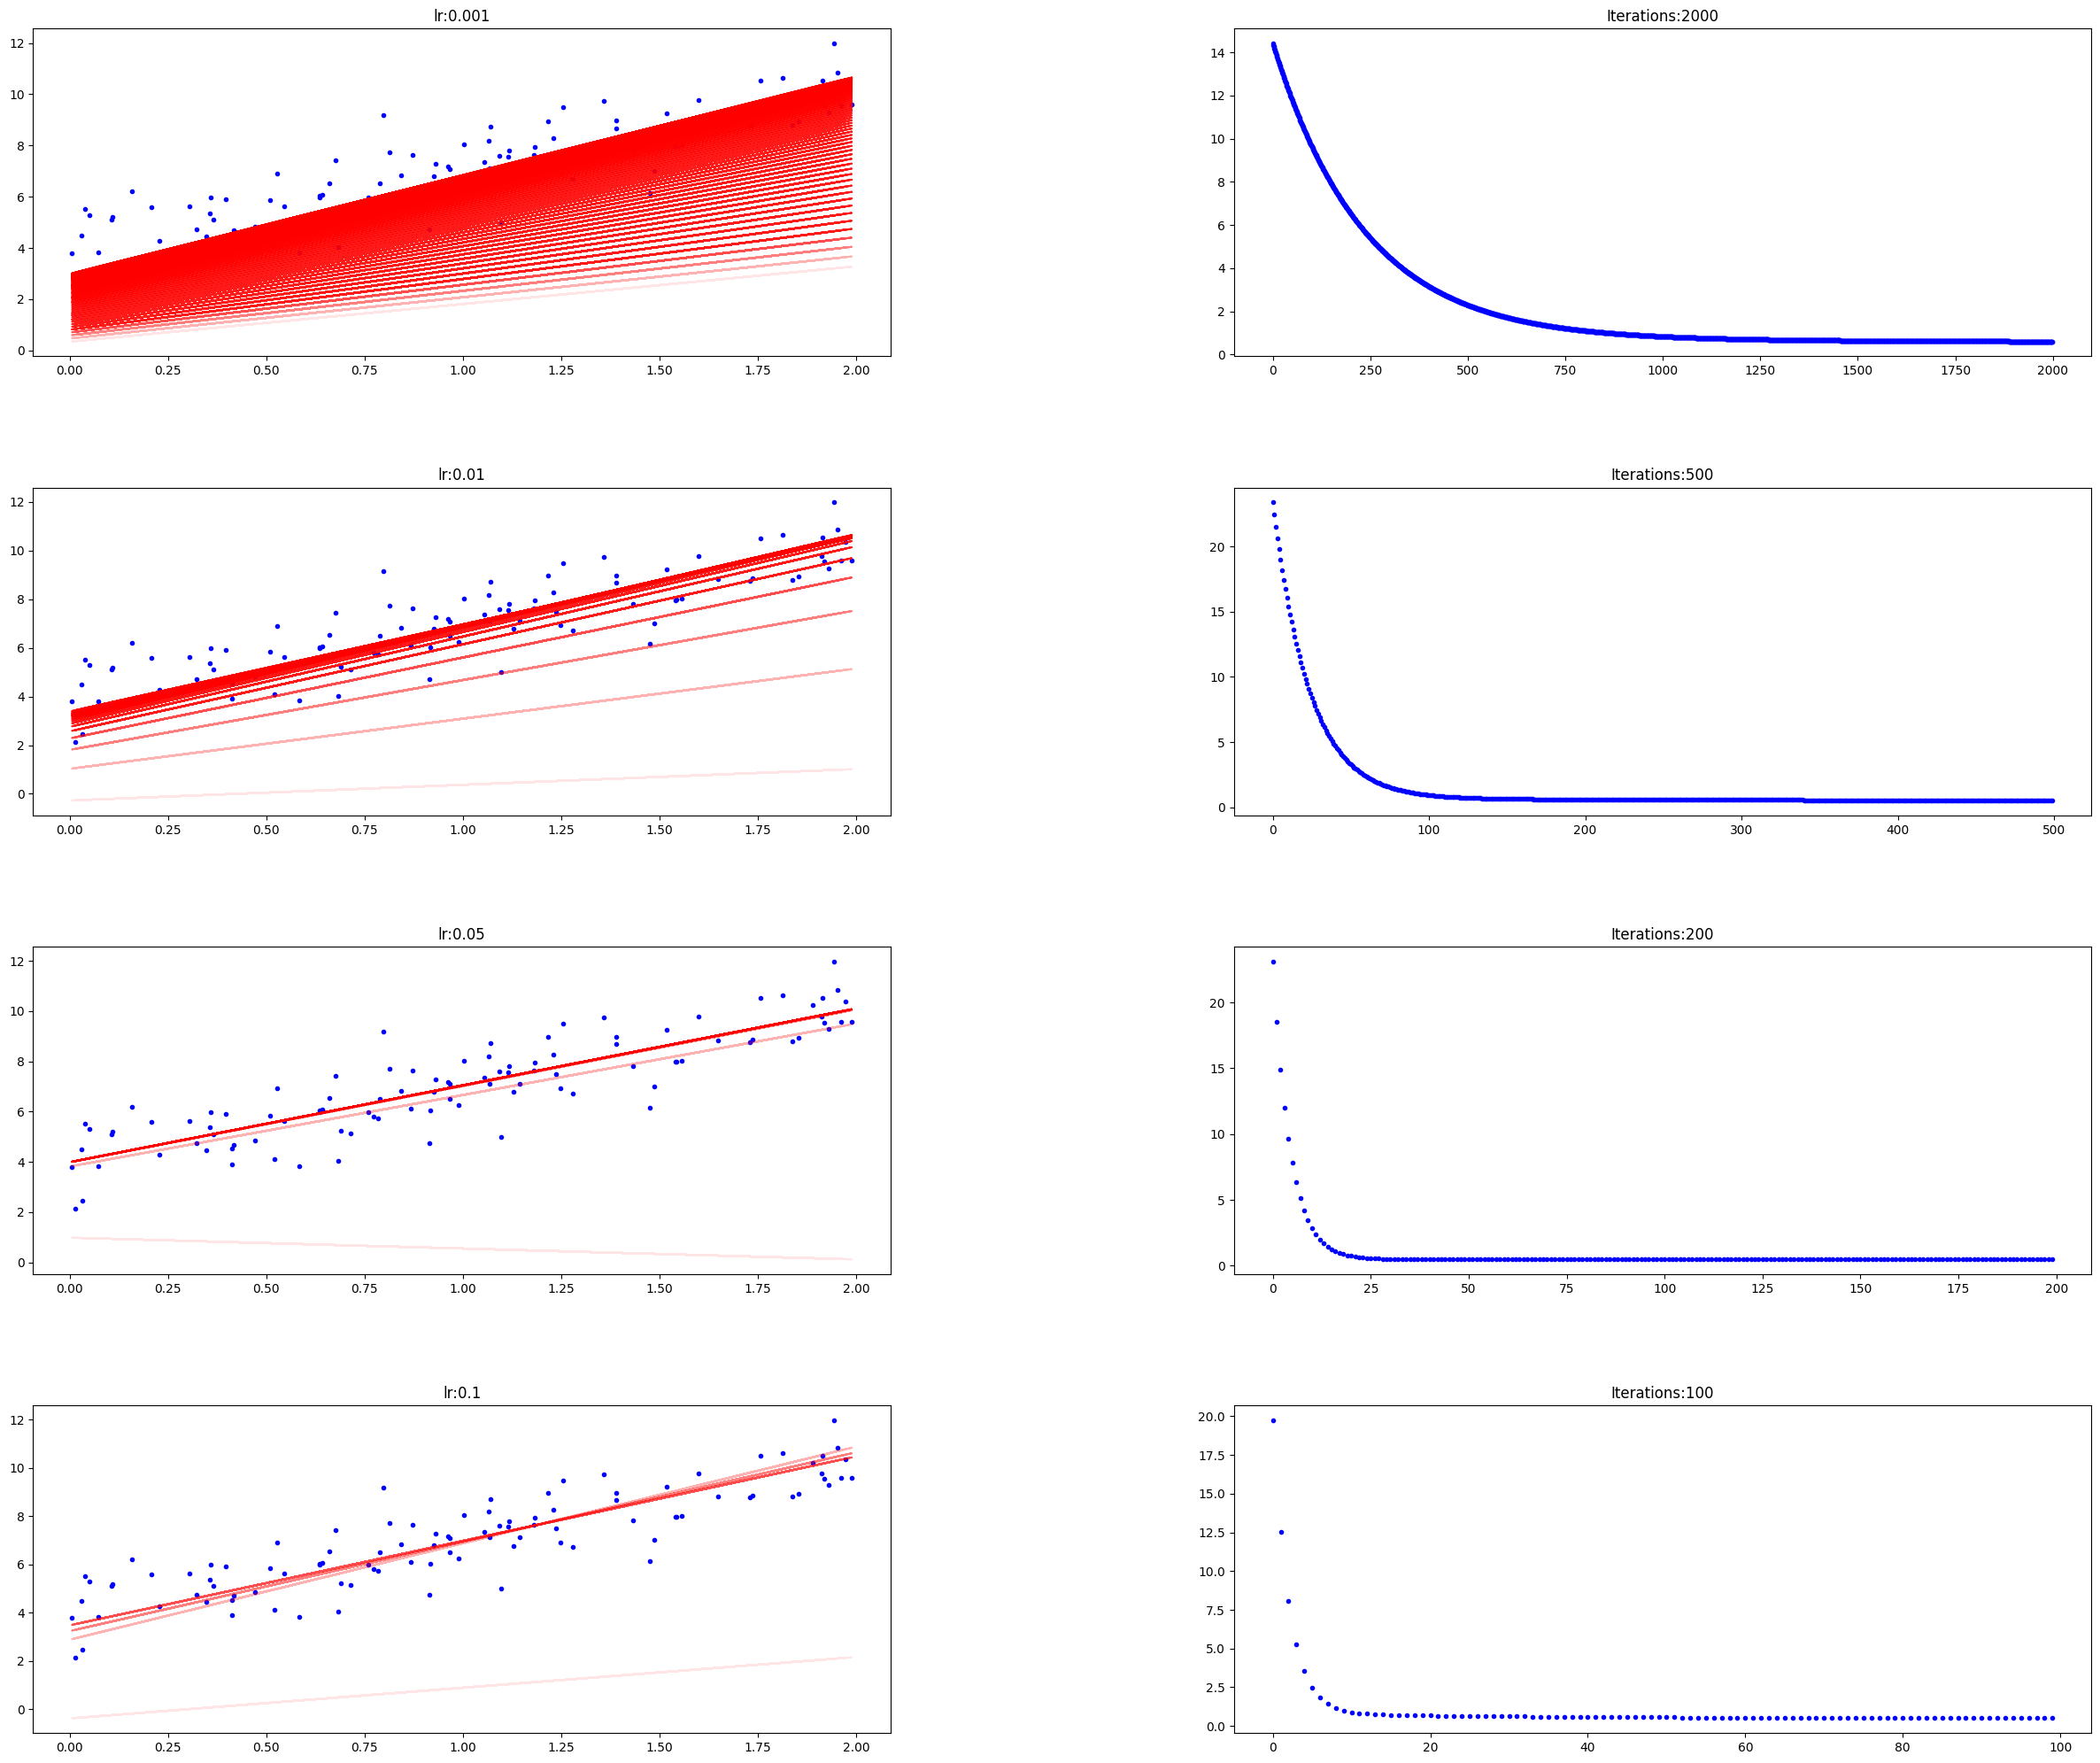

In [ ]:
fig = plt.figure(figsize=(30,25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]

count =0
for n_iter, lr in it_lr:
    count += 1

    ax = fig.add_subplot(4, 2, count)
    count += 1

    ax1 = fig.add_subplot(4,2,count)

    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)
